<a href="https://colab.research.google.com/github/Sukruth99/cs666student/blob/main/Copy_of_02068005_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

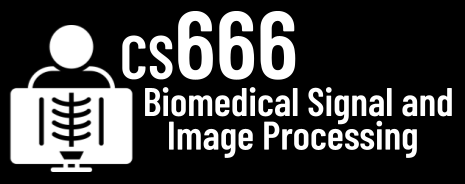

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.2 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
  
print(signal)
print(metadata)
print(len(signal))
# from metadata sampling_rate = 1000
# length of the array is TOTAL TIME = 15000 in seconds.

print("Sampling rate = 1000"+ " Total time=15000sec")

#sum=0;
#for i in range(0, len(signal)):    
 
   #sum = sum + signal[i]; 
#print(sum)
#s_rate = sum/len(signal)



      
  


[2044. 2044. 2044. ... 2044. 2045. 2043.]
{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}
15000
Sampling rate = 1000 Total time=15000sec


**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg

data = ecg.ecg(signal=signal, sampling_rate=1000.0, show=False)
r_peaks = data['rpeaks']
print(r_peaks)
#templates = data['templates']
#heart_rate = data['heart_rate']

#plt.figure()
#plt.plot(signal, label='ECG signal')
#plt.plot(r_peaks, signal[r_peaks], 'ro', label='R-peaks')
#plt.legend()


#plt.savefig('ecg_wave.png')

[  283  1204  2159  3188  4211  5188  6200  7232  8200  9157 10156 11198
 12159 13139 14162]


**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

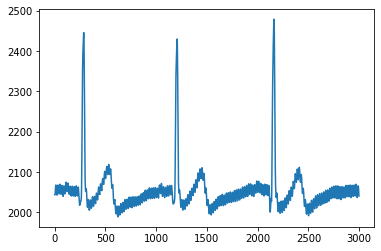

In [ ]:
from scipy.stats.stats import tsem
### TODO plot unfiltered signal
second_var=1
sampling_rate=1000
three_seconds= signal[(second_var-1)*sampling_rate:(second_var+2)*sampling_rate]
plt.plot(three_seconds, label="unfiltered")



Text(0.5, 0, 'filtered signal')

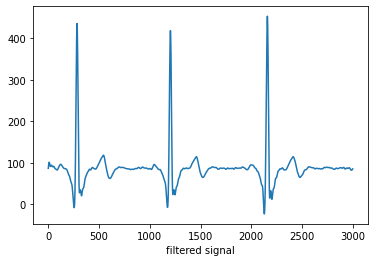

In [ ]:
### TODO plot filtered signal
filtered=data["filtered"]
filtered_3_sec = filtered[(second_var-1)*sampling_rate:(second_var+2)*sampling_rate]
plt.plot(filtered_3_sec, label="filtered signal")
plt.xlabel("filtered signal")



**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

[  283  1204  2159  3188  4211  5188  6200  7232  8200  9157 10156 11198
 12159 13139 14162]


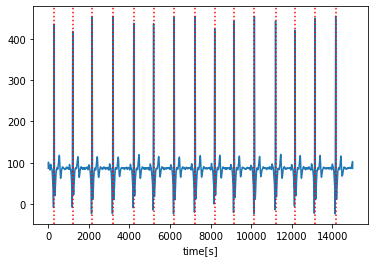

In [ ]:
data_f = ecg.ecg(signal=data["filtered"], sampling_rate=1000.0, show=False)
r_peaks_of_f =data_f["rpeaks"]
print(r_peaks_of_f)
plt.plot(filtered)
for i in r_peaks_of_f:
  {
      plt.axvline(x = i, color = 'r', ls=':')
  }
  plt.xlabel("time[s]")




**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.6 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

{'ECG_R_Peaks': array([ 1206,  2161,  3191,  4212,  5190,  6203,  7233,  8201,  9160,
       10158, 11200, 12161, 13142, 14165]), 'sampling_rate': 1000}


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


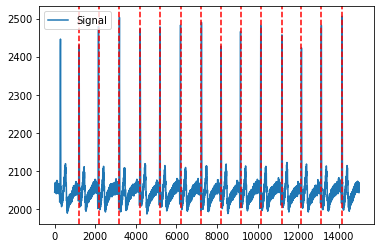

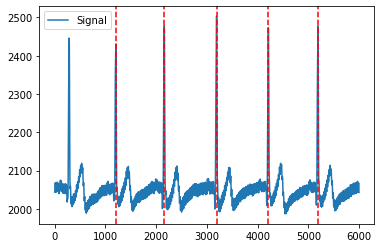

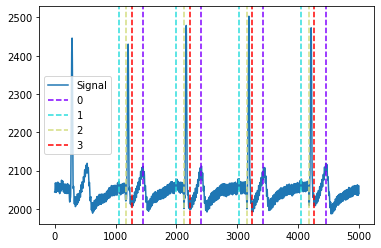

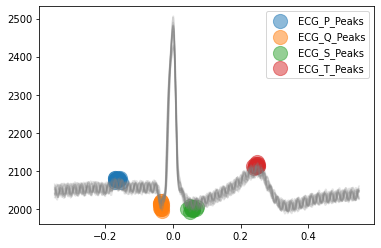

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
import neurokit2 as nk
import numpy as np
import pandas as pd

_, rpeaks = nk.ecg_peaks(signal, sampling_rate=1000)
print(rpeaks)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'],signal)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], signal[:6*(sampling_rate)])
_, four_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([four_peak['ECG_T_Peaks'][:4], 
                       four_peak['ECG_P_Peaks'][:4],
                       four_peak['ECG_Q_Peaks'][:4],
                       four_peak['ECG_S_Peaks'][:4]], signal[:5000])
_, waves_peak = nk.ecg_delineate(signal,  rpeaks, sampling_rate=1000, method="peak", show=True, show_type='peaks')











In [ ]:
# TODO Does the detection work well?
print("YES it works well.")

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0.5, 1.0, 'UNFILTERED SIGNAL')

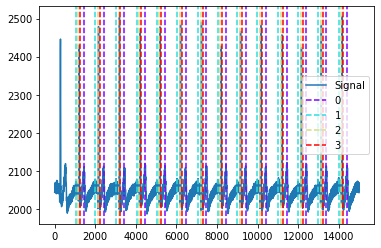

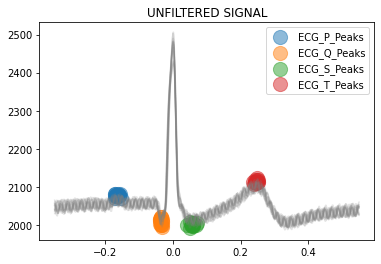

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# FOR UNFILTERED SIGNAL
_, four_peak_full = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([four_peak['ECG_T_Peaks'], 
                       four_peak['ECG_P_Peaks'],
                       four_peak['ECG_Q_Peaks'],
                       four_peak['ECG_S_Peaks']], signal)
_, waves_peak_full = nk.ecg_delineate(signal,  rpeaks, sampling_rate=1000, method="peak", show=True, show_type='peaks')
plt.title("UNFILTERED SIGNAL")

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0.5, 1.0, 'FILTERED SIGNAL')

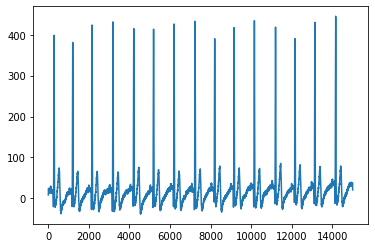

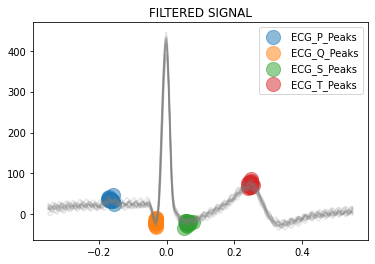

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filtered_signal = nk.signal_filter(signal, sampling_rate=1000, method="butterworth",
                                    lowcut=0.01, highcut=40)
plt.plot(filtered_signal)


_, waves_peak_full_fill = nk.ecg_delineate(filtered_signal,  rpeaks, sampling_rate=1000, method="peak", show=True, show_type='peaks')
plt.title("FILTERED SIGNAL")


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Text(0.5, 1.0, 'FILTERED SIGNAL from Biosppy')

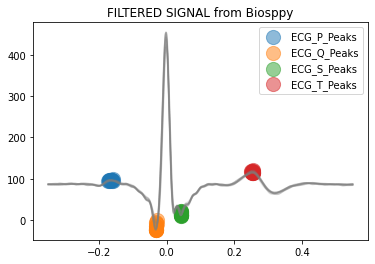

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak_full_fill = nk.ecg_delineate(data["filtered"],  rpeaks, sampling_rate=1000, method="peak", show=True, show_type='peaks')
plt.title("FILTERED SIGNAL from Biosppy")

In [ ]:
# TODO Which one works the best?
print("P and T peaks vary but rest of the peaks remain same") 

P and T peaks vary but rest of the peaks remain same


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#